<a href="https://colab.research.google.com/github/sedanurozer/Dictonary/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 
import numpy as np

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train=x_train/255.0
x_train.shape 

(50000, 32, 32, 3)

In [ ]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

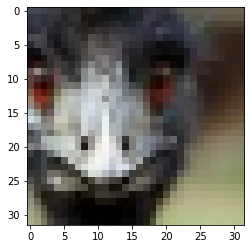

In [ ]:
plt.imshow(x_test[35])

In [28]:
cifar10_model=tf.keras.models.Sequential()
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu", input_shape=[32,32,3]))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Flatten())
cifar10_model.add(tf.keras.layers.Dropout(0.15,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
cifar10_model.add(tf.keras.layers.Dropout(0.15,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
cifar10_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [29]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8495 - sparse_categorical_accuracy: 0.3109
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2398 - sparse_categorical_accuracy: 0.5587
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0278 - sparse_categorical_accuracy: 0.6361
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9011 - sparse_categorical_accuracy: 0.6830
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8059 - sparse_categorical_accuracy: 0.7169
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7263 - sparse_categorical_accuracy: 0.7461
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6715 - sparse_categorical_accuracy: 0.7620
Epoch 8/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6197 - sparse_categorical_accuracy: 0.7799
Epoch 9/15
1563/1563 [==========

In [30]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9577 - sparse_categorical_accuracy: 0.7263


In [38]:
print("Test accuracy: {}".format(test_accuracy*100))

Test accuracy: 72.63000011444092
